## Métodos de Aprendizado de Máquina em Química
 
Prof. Luciano T. Costa \
e-mail: ltcosta@id.uff.br \
Departamento de Físico-Química \
Sala 309 \
Prof. Eduardo Krampser \
e-mail: eduardo.krempser@fiocruz.br \
MolMod-CS: www.molmodcs.uff.br \
Facebook: https://www.facebook.com/molmodcs \
Linkedin: https://www.linkedin.com/in/luciano-t-costa-90a85a164/ 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

**Random Forest**

A Random Forest é um exemplo dentre os métodos chamados de "ensemble", ou seja, seu resultado é baseado na combinação de diversos outros modelos, no caso da Random Forest, na combinação da predição realizada por diferentes árvores de decisão.

Os métodos de ensemble são, em geral, mais robustos às inconsistências dos dados e por isso podem apresentar maior capacidade de generalização. No caso da Random Forest, além da geração combinada de inúmeras árvores de decisão, seus mecanismos de particionamento de dados e atributos ampliam sua robustes frente aos ruídos e vieses da coleta de dados.

Nesse exemplo usamos o conjunto de dados disponível em [https://www.openml.org/d/1494], contendo 41 atributos (descritores moleculares) usados para classificar 1055 moléculas em duas classes (biodegradáveis prontas e não prontas).

In [25]:
datafile = "data/qsar-biodeg.csv"
df = pd.read_csv(datafile, header = 0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2


In [26]:
x = df.loc[:, df.columns != 'Class']
y = df.Class

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

O método de Random Forest possui diversos hiperparâmetros, entre os principais:
- n_estimators: número de árvores de decisão a serem geradas;
- criterion: medida a ser usada para a avaliar a qualidade da separação dos dados após o teste de cada nó (exemplo 'gini');
- max_depth: Profundidade máxima de cada árvore de decisão;
- max_features: O número de atributos a serem considerados ao procurar a melhor divisão

In [29]:
classifier = RandomForestClassifier(n_estimators=100) #Random Forest
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [30]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.8580441640378549
              precision    recall  f1-score   support

           1       0.85      0.95      0.90       206
           2       0.88      0.69      0.77       111

    accuracy                           0.86       317
   macro avg       0.86      0.82      0.84       317
weighted avg       0.86      0.86      0.85       317

[[195  11]
 [ 34  77]]


**Interpretação dos modelos**

Além da avaliação estatística dos modelos, todo resultado deve ser interpretado em sua qualidade e viabilidade sobre o domínio da aplicação. Um dos possíveis caminhos no suporte da interpretação dos modelos preditivos gerados é a análise sobre o impacto de cada atributo sobre o modelo final. 

Um método simples é a apresentação da importância dos atributos segundo o modelo de Random Forest gerado.

In [31]:
classifier.feature_importances_

array([0.06558648, 0.03467825, 0.01239179, 0.00129024, 0.02007579,
       0.01276696, 0.01880859, 0.02824048, 0.023975  , 0.0267852 ,
       0.0192093 , 0.03813239, 0.03697114, 0.02731956, 0.03531084,
       0.02725735, 0.02548698, 0.03449459, 0.00125851, 0.00064135,
       0.00012661, 0.06282054, 0.01063272, 0.00069103, 0.00181771,
       0.00039145, 0.04591452, 0.01991149, 0.00036868, 0.02965624,
       0.02882052, 0.00426298, 0.01549384, 0.02566884, 0.00999472,
       0.10279887, 0.03035618, 0.02875074, 0.07141693, 0.00967168,
       0.00975291])

In [32]:
#Importância dos atributos
feature_imp = pd.Series(classifier.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

V36    0.102799
V39    0.071417
V1     0.065586
V22    0.062821
V27    0.045915
V12    0.038132
V13    0.036971
V15    0.035311
V2     0.034678
V18    0.034495
V37    0.030356
V30    0.029656
V31    0.028821
V38    0.028751
V8     0.028240
V14    0.027320
V16    0.027257
V10    0.026785
V34    0.025669
V17    0.025487
V9     0.023975
V5     0.020076
V28    0.019911
V11    0.019209
V7     0.018809
V33    0.015494
V6     0.012767
V3     0.012392
V23    0.010633
V35    0.009995
V41    0.009753
V40    0.009672
V32    0.004263
V25    0.001818
V4     0.001290
V19    0.001259
V24    0.000691
V20    0.000641
V26    0.000391
V29    0.000369
V21    0.000127
dtype: float64

<BarContainer object of 41 artists>

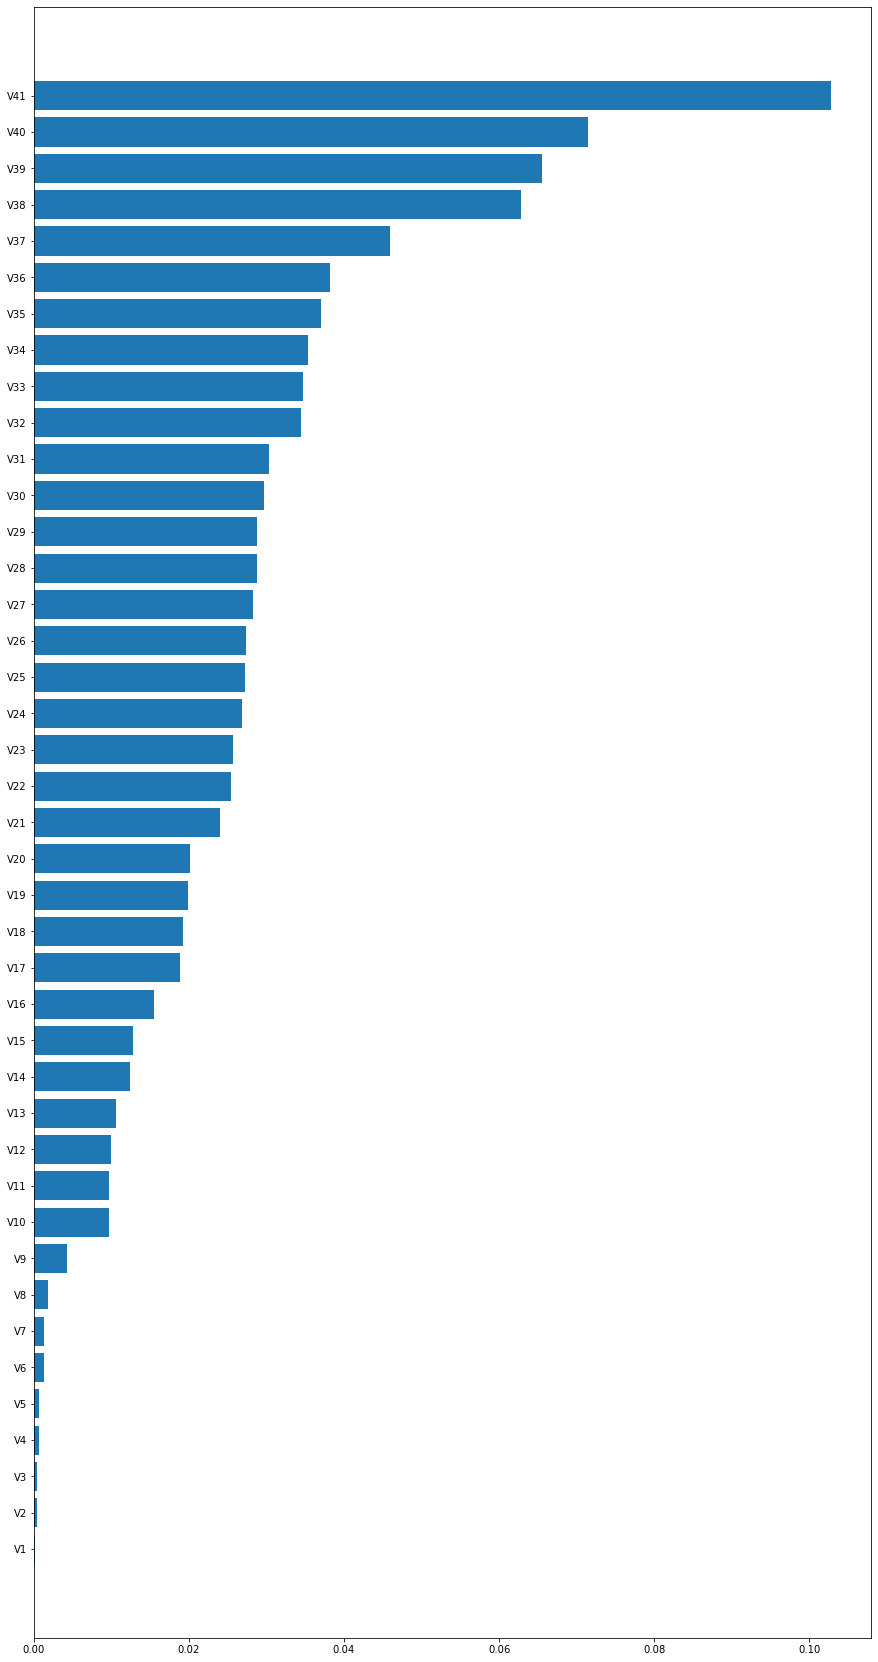

In [33]:
sorted_idx = classifier.feature_importances_.argsort()
classifier.feature_importances_[sorted_idx]
plt.figure(figsize=(15,30))
plt.barh(x.columns, classifier.feature_importances_[sorted_idx])

**Desbalanceamento de Dados**

Dentre os grandes desafios na aplicação de métodos de Aprendizado de Máquina está o desbalanceamento de dados, considerando que na maioria das situações práticas não possuímos as classes de interesse igualmente representadas. Observando o gráfico a seguir devemos nos perguntar, o que significa 80% de acurácia sobre esse conjunto de dados? Esse percentual possui o mesmo impacto caso a resposta do modelo seja a classe 1 ou a 2?

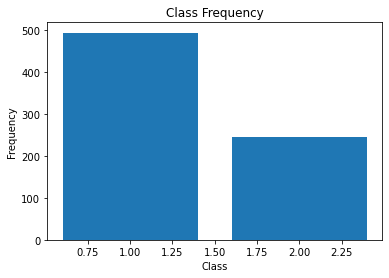

In [9]:
classes = y_train
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Nessas situações as medidas de avaliação e de treinamento dos modelos devem ser adequados. Uma possível solução é o tratamento dos dados de entrada, forçando-os para uma mais similar representação das classes. 
Um solução simplificada é a redução dos dados associados com a classe majoritária até a proximidade do quantitativo de dados da classe minoritária, técnica conhecida como 'undersample'.

In [34]:
resample_1_index = df.Class[df.Class.eq(1)].sample(245).index
resample_2_index = df.Class[df.Class.eq(2)].sample(245).index

df = df.loc[resample_1_index.union(resample_2_index)]

In [35]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.262,4.5221,1,0,0,0,0,28.3,3,4,...,0,0,0,4.415,2.115,0,9.152,0,0,1
1041,5.388,3.3114,0,0,0,1,3,39.3,4,1,...,1,0,1,3.780,2.188,0,8.357,0,0,1
1042,4.970,3.3797,0,0,0,0,4,40.9,3,1,...,1,0,1,3.774,2.267,0,8.239,0,0,1
1048,5.265,3.3444,2,0,6,0,1,35.3,2,3,...,0,3,0,4.698,2.463,2,9.666,0,0,1


In [36]:
x = df.loc[:, df.columns != 'Class']
y = df.Class

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

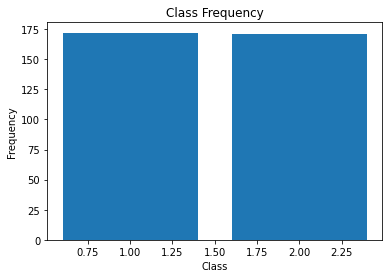

In [38]:
classes = y_train
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [39]:
classifier = RandomForestClassifier(n_estimators=100) #Random Forest
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.81      0.83        73
           2       0.82      0.85      0.83        74

    accuracy                           0.83       147
   macro avg       0.83      0.83      0.83       147
weighted avg       0.83      0.83      0.83       147



In [41]:
print(confusion_matrix(y_test, y_pred)) 

[[59 14]
 [11 63]]


In [42]:
y_predb = classifier.predict_proba(x_test)

In [43]:
y_predb

array([[0.69, 0.31],
       [0.32, 0.68],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.75, 0.25],
       [0.23, 0.77],
       [0.89, 0.11],
       [0.46, 0.54],
       [0.01, 0.99],
       [0.88, 0.12],
       [0.62, 0.38],
       [0.03, 0.97],
       [0.97, 0.03],
       [0.74, 0.26],
       [0.86, 0.14],
       [0.84, 0.16],
       [0.5 , 0.5 ],
       [0.94, 0.06],
       [0.5 , 0.5 ],
       [0.86, 0.14],
       [0.83, 0.17],
       [0.67, 0.33],
       [0.55, 0.45],
       [0.9 , 0.1 ],
       [0.41, 0.59],
       [0.18, 0.82],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.73, 0.27],
       [0.61, 0.39],
       [0.33, 0.67],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.05, 0.95],
       [0.09, 0.91],
       [0.31, 0.69],
       [0.81, 0.19],
       [0.67, 0.33],
       [0.44, 0.56],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.08, 0.92],
       [0.54, 0.46],
       [0.24, 0.76],
       [0.66, 0.34],
       [0.04, 0.96],
       [0.84, 0.16],
       [0.88,

**Curva ROC**

A Curva ROC nos permite avaliar a variação da sensibilidade e especificidade. 

In [48]:
from sklearn.metrics import RocCurveDisplay

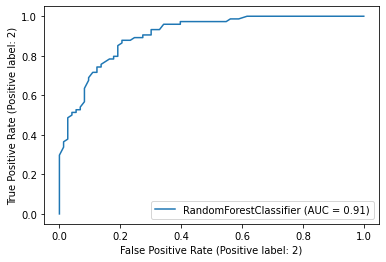

In [49]:
rfc_disp = RocCurveDisplay.from_estimator(classifier, x_test, y_test)

In [50]:
from sklearn.svm import SVC
svc = SVC(random_state=16)
svc.fit(x_train, y_train)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=rfc_disp.ax_)

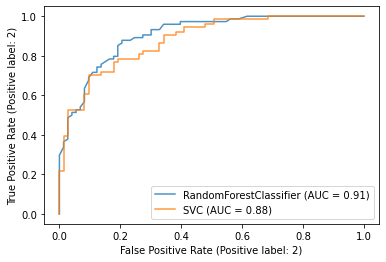

In [51]:
ax = plt.gca()
rfc_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()